## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
diabetes_data = pd.read_csv('../Documents/diabetes.csv')

## Step- 1 : Overview of the diabetes data

In [55]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [56]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
# diabetes true and false count
diabetes_data_trueCount = len(diabetes_data.loc[diabetes_data['Outcome'] == 1])
diabetes_data_falseCount = len(diabetes_data.loc[diabetes_data['Outcome'] == 0])

(diabetes_data_trueCount, diabetes_data_falseCount)

(268, 500)

In [58]:
# basic statistic summary of the data 
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handling the Missing Values ¶


In [59]:
# it would be easier and zeros need to be replaced with suitable values

diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose',
                                                                                                      'BloodPressure',
                                                                                                      'SkinThickness',
                                                                                                      'Insulin','BMI']].replace(0,np.NaN)
    
    


In [60]:
# p = diabetes_data.hist(figsize = (20,20))

## Aiming to impute nan values for the columns in accordance with their distribution

In [61]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## Plotting after Nan removal

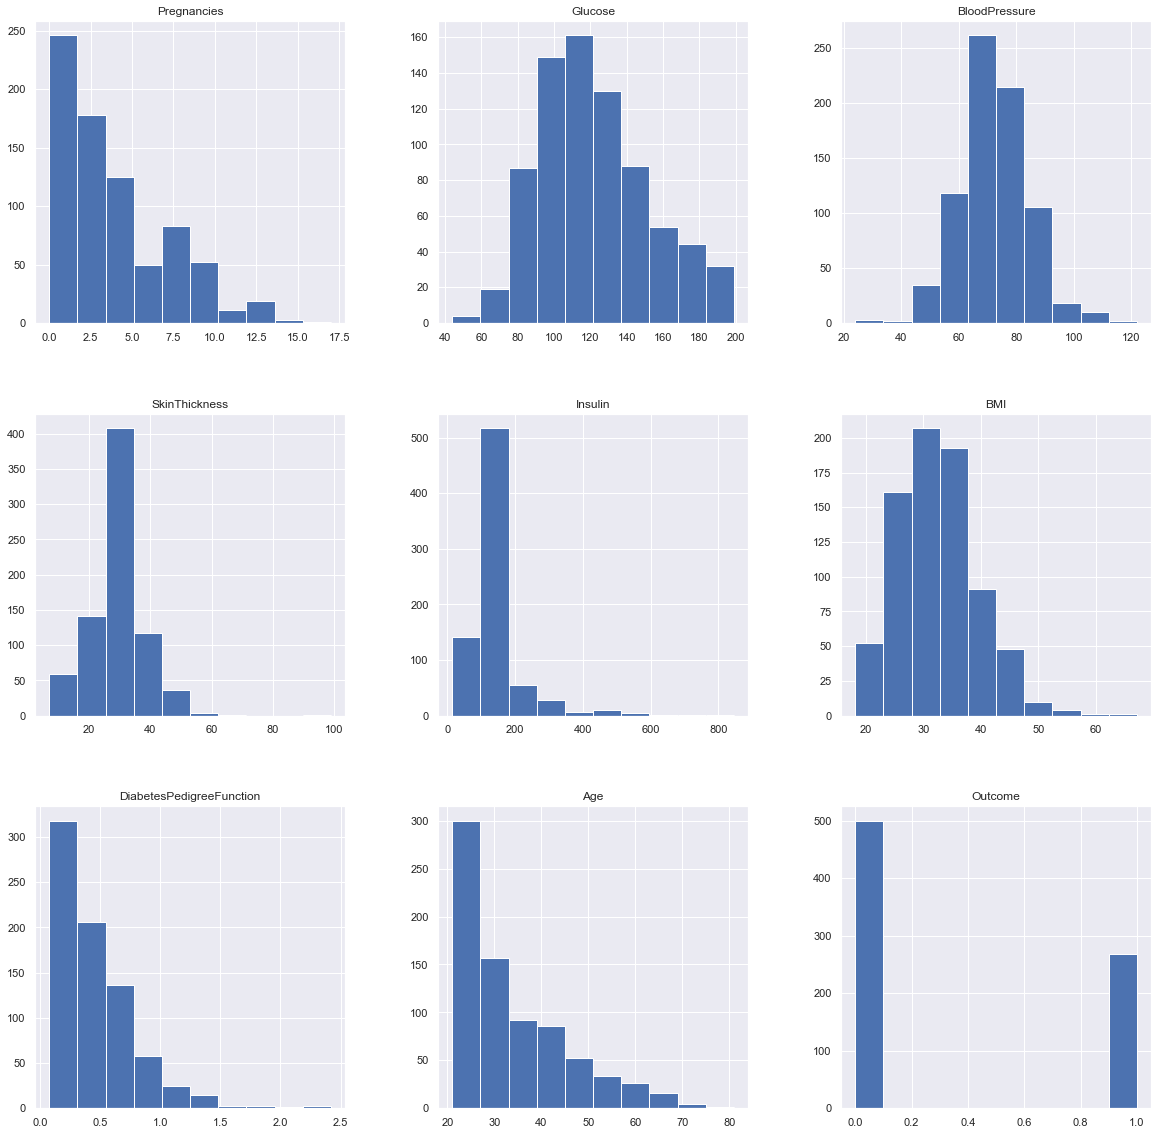

In [62]:
p = diabetes_data_copy.hist(figsize = (20,20))

### Outcome Analysis
##### The Data is biased towards people who are non-diabetics

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:ylabel='Outcome'>

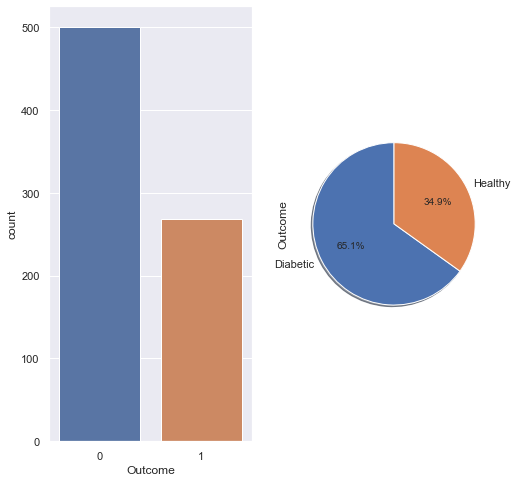

In [63]:
print(diabetes_data.Outcome.value_counts())
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(diabetes_data['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

diabetes_data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

#### The first plot shows the count values of the outcome and second pieplot shows that 65.1% people are diabetic and 34.9% people are Healthy

## Heatmap for unclean data

In [64]:
# plt.figure(figsize=(12,10))
# p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='viridis')

## Heatmap for clean data

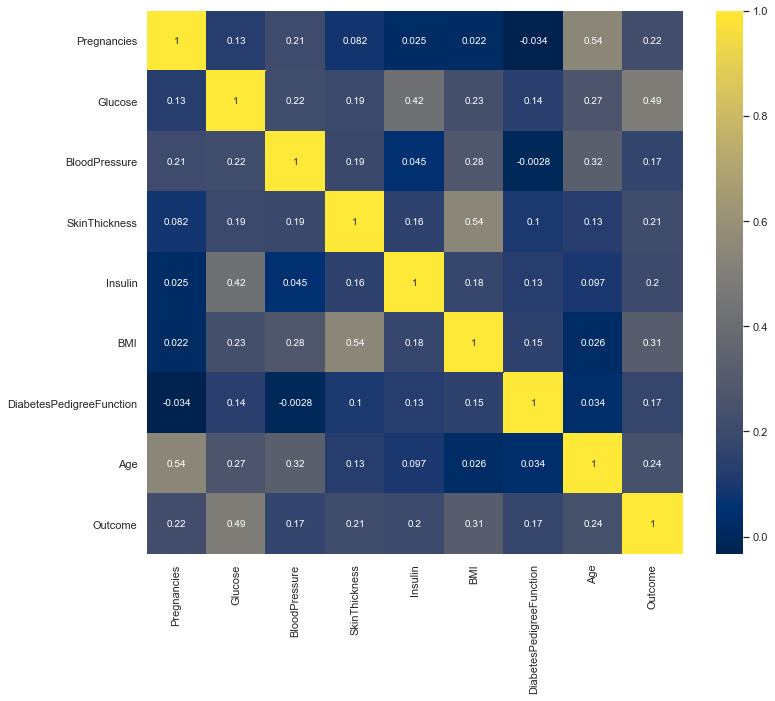

In [65]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='cividis')

#### The correlation plot shows the relation between the parameters.

##### 1. Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
##### 2. Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
##### 3. BloodPressure and SkinThickness have tiny correlation with the outcome.
##### 4. There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

### training and evaluating the model

In [66]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X = diabetes_data_copy.iloc[:,0:8]
y = diabetes_data_copy.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(X_train)
x_test_std = ss.transform(X_test)

### 1. Decision Tree Algorithm

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [69]:
grid_dtc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test_std,y_test))

Best Score ==>  0.7509049773755656
Tuned Paramerers ==>  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}
Accuracy on Train set ==>  0.8015564202334631
Accuracy on Test set ==>  0.7244094488188977


## Decision tree best accuracy :  0.7509

### 2. Apply KNN Algorithm

In [70]:
# apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [72]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [73]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.62204724409449 % and k = [12]


## Result Visualisation

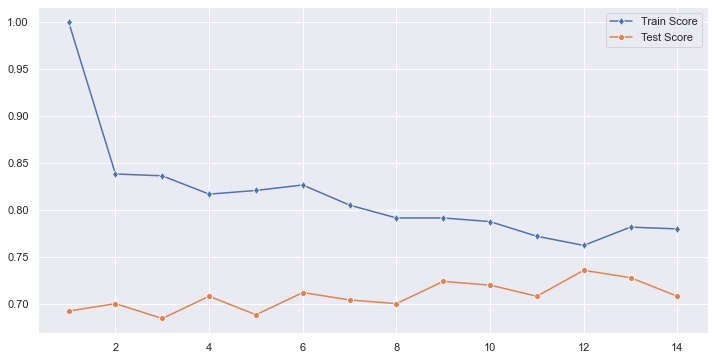

In [74]:
plt.figure(figsize=(12,6))
p = sns.lineplot(range(1,15),train_scores,marker='d',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 12 hence 12 is used for the final model

In [75]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn_accuracy = knn.score(X_test,y_test)
print('KNN accuracy : ', knn_accuracy)

KNN accuracy :  0.7362204724409449


## KNN accuracy :  0.7362

In [76]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,25,168
1,42,44,86
All,185,69,254


Text(0.5, 12.5, 'Predicted label')

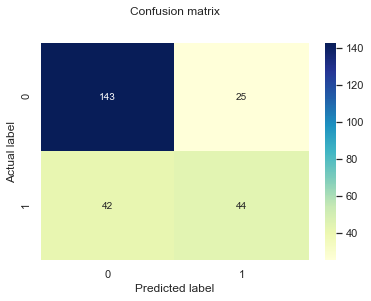

In [77]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       168
           1       0.64      0.51      0.57        86

    accuracy                           0.74       254
   macro avg       0.71      0.68      0.69       254
weighted avg       0.73      0.74      0.73       254



In [79]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:  " + str(knn_cv.best_score_))
print("Best Parameters:  " + str(knn_cv.best_params_))

Best Score:  0.7526440879382056
Best Parameters:  {'n_neighbors': 31}


## 3. Apply Random Forest Classifier Algorithm

In [80]:
# Apply RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)
random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [81]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics
print("RFC Accuracy  : {0:.4f}".format(metrics.accuracy_score(y_test, predict_train_data)))

RFC Accuracy  : 0.7441


## RFC Accuracy  : 0.7441

### Hyper parameter optimization

In [82]:
# Hyper parameter optimization

params = {
    'learning_rate'       : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth'           : [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight'    : [1, 3, 5, 7],
    'gamma'               : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree'    : [0.3, 0.4, 0.5, 0.7]
}

In [83]:
# Hyper parameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [84]:
classifier = xgboost.XGBClassifier()

random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

### Getting excution time using RandomizedSearchCV

In [85]:
# getting excution time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        t_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3000)
        t_min, t_sec = divmod(temp_sec, 60)
        print('\n Time taken : %i hours %i minutes and %s seconds.' %(t_hour, t_min, round(t_sec, 2)))

In [86]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X_train, y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[10:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken : 0 hours 0 minutes and 21.63 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.2s finished


### Time taken 

In [87]:
 random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, notone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
classifier.fit(X_train, y_train)

[10:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { notone_constraints } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, notone_constraints='()',
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
# confussion metrics accurary_score
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[135  33]
 [ 31  55]]
0.7480314960629921


### Confusion matrix accuracy_score 0.7481



In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train.ravel())

[10:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { notone_constraints } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { notone_constraints } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

In [93]:
score

array([0.78640777, 0.70873786, 0.77669903, 0.67961165, 0.76470588])

In [94]:
score.mean()

0.7432324386065106

## 4. Apply Support Vector Mechine Algorithm

In [95]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC()

In [96]:
y_pred_svm = model_svm.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred_svm)

0.7401574803149606

### SVM Accuracy : 0.7402

## 5. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lgr_classifier=LogisticRegression()
lgr_classifier.fit(X_train,y_train)

LogisticRegression()

In [99]:
y_pred_lgr = lgr_classifier.predict(X_test)

In [100]:
print(confusion_matrix(y_test,y_pred_lgr))
print(accuracy_score(y_test,y_pred_lgr))

[[140  28]
 [ 36  50]]
0.7480314960629921


### Logistic Regression accuracy :  0.7481

## 6. Apply Naive Bayes Algorithm

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [105]:
y_pred_nb = nb_model.predict(X_test)

In [106]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print (cm_nb)
print("f1-score : ", f1_score(y_test, y_pred_nb))
print("Naive bayes accuracy : ", accuracy_score(y_test, y_pred_nb))

[[134  34]
 [ 33  53]]
f1-score :  0.6127167630057804
Naive bayes accuracy :  0.7362204724409449


### Naive bayes accuracy :  0.7363

## 7. Linear Regression Algorithm

In [107]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
lr_model = linear_model.LinearRegression()

In [108]:
lr_model.fit(X_train, y_train)
y_pred_linear = lr_model.predict(X_test)

In [109]:
from sklearn.model_selection import cross_val_score    #importing 
scores_lr = cross_val_score(lr_model,X,y,scoring="neg_mean_squared_error" , cv=10)  
rmse_scores=np.sqrt(-scores_lr).mean()    #calculating  root mean sq. of the resulted scores of array 
rmse_scores

0.39589915297302236

In [110]:
'Linear regression accuracy : %.3f' % rmse_scores

'Linear regression accuracy : 0.396'

## 'Linear regression accuracy : 0.396'

## Supervised Algorithms Accuracy Line Plot

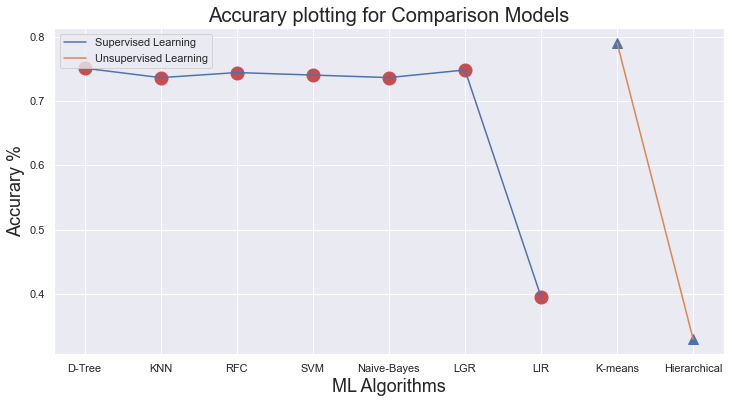

In [40]:
plt.figure(figsize=(12, 6))
x = ['D-Tree', 'KNN', 'RFC', 'SVM', 'Naive-Bayes', 'LGR', 'LIR']
y = [0.7509,0.7362,  0.7441, 0.7402, 0.7363, 0.7481, 0.396]

x2 = ['K-means', 'Hierarchical']
y2 = [0.79, 0.33]

plt.plot(x,y, 'ro', lw=5, markersize=13)
plt.plot(x2,y2, 'b^', markersize=10)

plt.xlabel("ML Algorithms", fontsize=18)
plt.ylabel("Accurary %", fontsize=18)
plt.plot(x,y,label = 'Supervised Learning')
plt.plot(x2,y2,label = 'Unsupervised Learning')

plt.title("Accurary plotting for Comparison Models", fontsize=20)
plt.legend()
plt.show()